In [8]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Load Data
d = np.loadtxt('zeolite_rings_dpe.csv',delimiter = ',',dtype=object)

In [6]:
# Create function that will turn a ring list in to feature vector
def rings2features(r):
    r = r.split('-')
    f = np.zeros(20)
    for R in r:
        R = int(R)
        f[R]+=1
    return f

In [20]:
np.random.seed(1) # Set seed so this is reproducible
fws = ['BEA','CHA','FAU','FER','MFI','MOR']
xtrain = []
xtl = []
xvalidate = []
xvl = []
ytrain = []
yvalidate = []

ts = []
os = []
for f in fws:
    tmpts = []
    for line in d:
        if line[0] == f:
            tmpts.append(line[1])
    tmpts = np.array(tmpts)
    tmpts = np.unique(tmpts)
    ts.append(tmpts)
for i, f in enumerate(fws):
    on = []
    for j, t in enumerate(ts[i]):
        tmpos =[]
        for line in d:
            if line[0] ==f:
                if line[1] == t:
                    tmpos.append(line[2])
        on.append(len(tmpos))
    os.append(on)

for i, f in enumerate(fws):
    for j, t in enumerate(ts[i]):
        olines = []
        n = os[i][j]
        r = np.random.randint(n)
        for k, line in enumerate(d):
            if line[0]==f and line[1]==t:
                olines.append(k)
        line = d[olines[r]] 

        # label information
        temp = line[0:3]
        xvl.append(temp)

        # x data
        temp = rings2features(line[13])
        temp = list(temp)
        temp2 = rings2features(line[3])
        temp2 = list(temp2)
        temp3 = rings2features(line[14])
        temp3 = list(temp3)
        for p in temp2:
            temp.append(p)
        for p in temp3:
            temp.append(p)
        #                 for i in range(8,13):
        #                     temp.append(line[i])
        xvalidate.append(temp)

        # y data
        yvalidate.append([line[6]])
        
        del olines[r]
        
        for q in olines:
            line = d[q]
            # label information
            temp = line[0:3]
            xtl.append(temp)

            # x data
            temp = rings2features(line[13])
            temp = list(temp)
            temp2 = rings2features(line[3])
            temp2 = list(temp2)
            temp3 = rings2features(line[14])
            temp3 = list(temp3)
            for p in temp2:
                temp.append(p)
            for p in temp3:
                temp.append(p)
#                 for i in range(8,13):
#                     temp.append(line[i])
            xtrain.append(temp)

            #y data

            ytrain.append([line[6]])
            
            
xtrain = np.array(xtrain).astype(float)
xvalidate = np.array(xvalidate).astype(float)
ytrain = np.array(ytrain).astype(float)
yvalidate = np.array(yvalidate).astype(float)

xtrain = torch.tensor(xtrain)
xvalidate = torch.tensor(xvalidate)
ytrain = torch.tensor(ytrain)
yvalidate = torch.tensor(yvalidate)

xtrain = Variable(xtrain)
xvalidate = Variable(xvalidate)
ytrain = Variable(ytrain)
yvalidate = Variable(yvalidate)

training loss =  10.528979301452637
validating loss =  10.510871887207031


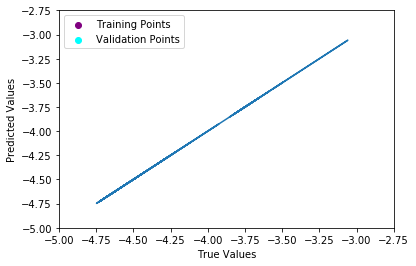

In [34]:
torch.manual_seed(1);
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(len(xtrain[0]),60)
        self.fc2 = nn.Linear(60,40)
        self.fc3 = nn.Linear(40,1)
    def forward(self,x):
        x = F.softsign(self.fc1(x))
        x = F.softsign(self.fc2(x))
        x = self.fc3(x)
        return F.softsign(x)
net = Net()
optimizer = torch.optim.Rprop(net.parameters(), lr = 0.0002)
criterion = nn.MSELoss()


for t in range(2500):
    optimizer.zero_grad()
    net_out = net(xtrain.float())
    loss = criterion(net_out, ytrain.float())
    loss.backward()
    optimizer.step()

# print loss values and plot training data
print('training loss = ',loss.item())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ytrain,ytrain)
ax.scatter(ytrain,net_out.data.numpy(),c='purple',label='Training Points')
ax.set_ylim([-5,-2.75])
ax.set_xlim([-5,-2.75])
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')

# Validate the network
prediction = net(xvalidate.float())
loss = criterion(prediction,yvalidate.float())

# print loss values and plot validating data
print('validating loss = ', loss.item())
ax.scatter(yvalidate,prediction.data.numpy(),c='cyan',label='Validation Points')
#ax.axis('square')
#ax.set_aspect('equal',adjustable='box')
ax.legend(loc='best')
fig.show()

In [ ]:
# Train the network
# Set network seed
torch.manual_seed(1);

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_omystatutput)
        
    def forward(self,x):
        x = F.softsign(self.hidden(x))
        x = self.predict(x)
        return x
net = Net(n_feature = len(xtrain[0]), n_hidden = 60, n_output=1)
optimizer = torch.optim.Rprop(net.parameters(), lr = .0002)
loss_func = torch.nn.MSELoss()
for t in range(1000):
    prediction = net(xtrain.float())

    loss = loss_func(prediction,ytrain.float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
# print loss values and plot training data
print('training loss = ',loss.item())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ytrain,ytrain)
ax.scatter(ytrain,prediction.data.numpy(),c='purple',label='Training Points')
ax.set_ylim([-5,-2.75])
ax.set_xlim([-5,-2.75])
ax.set_xlabel('True Values')
ax.set_ylabel('Predicted Values')

# Validate the network
prediction = net(xvalidate.float())
loss = loss_func(prediction,yvalidate.float())

# print loss values and plot validating data
print('validating loss = ', loss.item())
ax.scatter(yvalidate,prediction.data.numpy(),c='cyan',label='Validation Points')
#ax.axis('square')
#ax.set_aspect('equal',adjustable='box')
ax.legend(loc='best')
fig.show()